<a href="https://colab.research.google.com/github/hellocrisel/data-science/blob/main/Derivatives%20Trading%20%20Put_Option_Payoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Risk profiles of put options buyer and seller**

Buying a put option gives you the right, but not the obligation to sell the underlying security at the given strike price, within a specific time period. Therefore a put option payoff at expiration depends on where the underlying price is relative to the put option strike price.

In this notebook, we will plot a put buyer's and a put seller's payoff graph for a 900 strike price put on the Infosys stock.

#**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For making attractive and informative statistical graph
sns.set_style('darkgrid')

#**Put payoff**

We define a function put_payoff that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the put option and the premium of the put option as input.

It returns a numpy array containing the profit from put option for different stock prices. When the stock price is less than the strike price, the profit is measured as the difference between strike price and stock price, and when the stock price is greater than the strike price then the profit is zero. After this, a put premium is deducted from the Profit-n-Loss(pnl) to compute the payoff.

In [4]:
def put_payoff (sT, strike_price, premium):
    pnl = np.where(sT<strike_price, strike_price - sT, 0)
    return pnl - premium

#**Define parameters**

We will define the spot price, the strike price, premium, and a range of possible values for the Infosys stock price at expiry.


In [5]:
# Infosys stock price
spot_price = 900

# Put strike price and cost
strike_price = 900
premium = 20

# Stock price range at the expiration of the put
# We have defined range for the stock price at expiry as +/- from spot price
# Syntax : numpy.arange(start price, stop price)
sT = np.arange(0.9*spot_price,1.1*spot_price)

#**Put option buyer off**


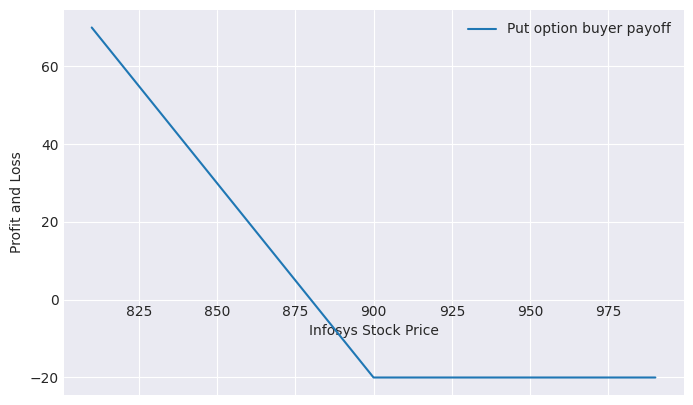

In [7]:
payoff_long_put = put_payoff(sT, strike_price, premium)

#Plot the graph
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Put option buyer payoff')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

#**Observations:**

- Even if the price of Infosys goes above the strike price of 900, the maximum loss seems to be just INR 20/-. Therefore, the loss to the put option buyer is restricted to the extent of the premium he has paid.

- The profit from this put option seems to increase linearly as and when Infosys starts to move below the strike price of 900. Therefore, the lower the spot price goes, the higher will be the profit.

- Though the put option is supposed to make a profit when the spot price moves below the strike price, the put option buyer first needs to recover the premium he has paid.

- From the above points, we can say that the buyer of the put option has limited risk and the potential to make a huge profit.

#**Put option seller payoff**

To get the payoff graph for option seller, we have multiplied the payoff of option buyer by -1.0, as the option buyer makes the profit, the option seller will lose the exact same amount and vice-versa.

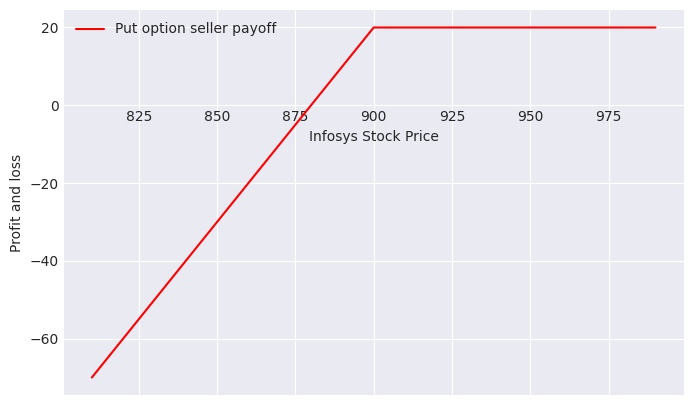

In [10]:
payoff_short_put = payoff_long_put * -1.0

#Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put, label = 'Put option seller payoff', color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

#**Observations:**

- The put option seller payoff looks like a mirror image of the put option buyer payoff.

- The profit is restricted to INR 20/- as long as the spot price is trading at any price above the strike price of 900.
- From 900 to 880, we can see the profits getting reduced.
- Below 880, the put option seller starts losing money. The losses increase with a decrease in stock price.
- Therefore, you sell a put option only when your view is that the underlying asset will not fall beyond the strike price.